In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, utils, models
import warnings
warnings.filterwarnings('ignore')
import os
from CNN import CNN as cnn
from PrepareData import PrepareData as pr

2024-01-21 23:42:51.097813: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-21 23:42:51.261572: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 23:42:51.261665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 23:42:51.297008: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-21 23:42:51.384862: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-21 23:42:51.387065: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
path_train_normal = '../input/train/NORMAL'
path_train_disease = '../input/train/PNEUMONIA'
path_test_normal = '../input/test/NORMAL'
path_test_disease = '../input/test/PNEUMONIA'

In [3]:
# train Normal
X_train_normal = pr.getImages(path_train_normal)
y_train_normal = ['normal']*len(X_train_normal)

# train Disease
X_train_disease = pr.getImages(path_train_disease)
y_train_disease = ['disease']*len(X_train_disease)

X_train = X_train_normal + X_train_disease
y_train = y_train_normal + y_train_disease

# test Normal
X_test_normal = pr.getImages(path_test_normal)
y_test_normal = ['normal']*len(X_test_normal)

# test Disease
X_test_disease = pr.getImages(path_test_disease)
y_test_disease = ['disease']*len(X_test_disease)

X_test = X_test_normal + X_test_disease
y_test = y_test_normal + y_test_disease


In [4]:
df = pd.DataFrame({'X':X_train+X_test, 'y':y_train+y_test})


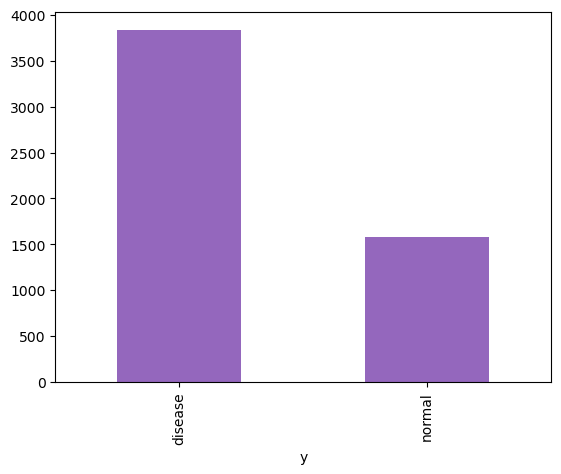

In [5]:
df['y'].value_counts().plot(kind='bar', color=sns.color_palette()[4]);

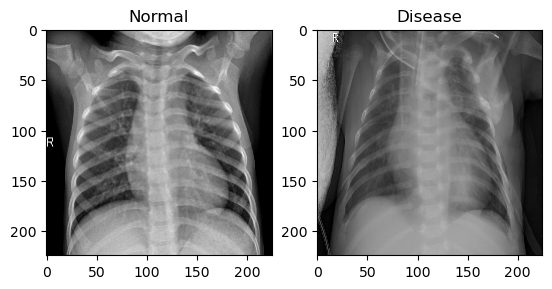

In [6]:
plt.subplot(1, 2, 1)
plt.imshow(X_train_normal[0]), plt.title("Normal");
plt.subplot(1, 2, 2)
plt.imshow(X_train_disease[2]), plt.title("Disease");

In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = utils.to_categorical(y_train, num_classes=2)
y_test = utils.to_categorical(y_test, num_classes=2)

In [ ]:
cnn(X_train, X_test, y_train, y_test)